In [59]:
import argparse
import torch
import datetime
import json
import yaml
import os
import numpy as np
from dataset_pm25 import get_dataloader
from main_model import CSDI_PM25
from utils import train, evaluate
import matplotlib.pyplot as plt

In [60]:
np.random.seed(123)
torch.manual_seed(0)

# generate simu data for fast test

N = 100
K = 8
L = 50 # len of total T 


func_base = [np.sin,np.cos,lambda x:0.1 * x,lambda x:-0.1 * x]

coef = 1

func_list = [lambda x:np.sin(x*2*np.pi ), lambda x:np.cos(x*2*np.pi ),\
     lambda x:np.sin(x*2*np.pi )*np.sin(x*2*np.pi ), lambda x:2*np.sin(x*2*np.pi )*np.sin(x*2*np.pi )*np.cos(x*2*np.pi ),
     lambda x:np.cos(x*2*np.pi )*np.sin(x*2*np.pi ) + 0.3*x, lambda x:np.sin(x*2*np.pi )*np.sin(x*2*np.pi )*np.sin(x*2*np.pi ) - 0.3*x,
     lambda x:np.cos(x*2*np.pi )*np.cos(x*2*np.pi )*np.exp(-0.1*x) - 0.2*x,lambda x:np.cos(x*2*np.pi )*np.cos(x*2*np.pi )*np.sin(x*2*np.pi )*np.exp(0.4*x)+0.2*x]


# generate data
# T_array = np.sort(np.random.rand(N))*2*np.pi 

T_array = np.linspace(0,1,L)

data_all = np.stack([func(T_array) for func in func_list]).T
data_all.shape

(50, 8)

In [62]:
noise_data = []
mask_gt = []
mask_obs = []
for i in range(N):
    noise_data.append(data_all + np.random.randn(*(data_all.shape))*0.02)
noise_data = np.array(noise_data)

mask_obs = np.ones(noise_data.shape)
mask_gt = mask_obs*1


for j in range(K):
    
    mod = j % 4
    # print(mod*10)
    mask_gt[:,mod*10:mod*10 + 20,j]=0
    

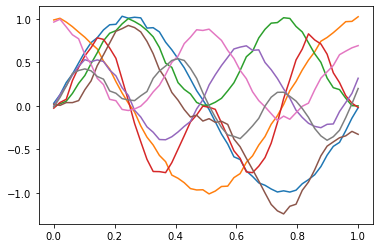

In [53]:
plt.plot(T_array,noise_data[1])

In [63]:
simu_data = {
    'data_all':noise_data,# time series
    'data_shape':(N,L,K),
    'time_step':T_array,# Time step
    'mask_obs':mask_obs, 
    'mask_gt':mask_gt
}
np.save('./data/simu/simu_data_noise_new.npy', simu_data)